In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("Data/Covid Data.csv")
print(df.shape)
df.head()
#df.info()


(1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [9]:
# get a sense of what values are in the entire dataset. In the description on Kaggle it says that 1 means 'yes' and 2 means 'no', but as you can see there
# are some missing and misinput information so I need to get rid of those that don't belong like the values '97' and '99'.
print(df.PATIENT_TYPE.value_counts())
print(df.DATE_DIED.value_counts())
print(df.INTUBED.value_counts())
print(df.PNEUMONIA.value_counts())
print(df.AGE.value_counts())





1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64
97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64
2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64
30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


In [18]:
# in order to make sure that values 97 and 99 are not mixed into any of the variables, each variable must be a dataframe consisting of either
# a 1 for 'yes' or a 2 for 'no'.

df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]


In [ ]:
# There are 21 different variables and over a million rows of data. In order to build
# a model that tries to predict a patients risk level, I need to determine what
# what variable are associated with high risk and those associatde with low risk.

# I want to focus on only variable that have high impact on risk. I also want to have an emphasis on looking into
# what the conditions were for somebody who died and what similiarites those people shared.
# Simply because death means that those patients were obviously very high risk since they unfortunately passed away.

# I will be looking to use a binary classification type of supervised learning since we are
# trying to label a patient as high or low risk based on their info available.

# Before starting I'm gonna meet the requirements of supervised learning with scikit-learn
# since we used it in the past and had a data camp covering it, 
# specifically will start by removing missing values, having data in numeric format, 
# and have the data stored in a dataframe like I started above.

#I'm now going to make graphs for different variables against an is dead variable that I will make below this to
# try and figure out the most important variables.

In [31]:
df.head()
print(df.DATE_DIED.value_counts())

# important to note that 9999-99-99 must mean that patient is still alive since it is not a real date while all the others are real dates.
# Set dead people to 1 for yes they are dead, or to 2 for no still alive.
df["DEAD"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

9999-99-99    483471
07/07/2020       377
16/07/2020       367
06/07/2020       363
12/06/2020       359
               ...  
20/01/2020         1
15/04/2021         1
11/09/2020         1
30/03/2021         1
01/04/2021         1
Name: DATE_DIED, Length: 305, dtype: int64


Text(0.5, 1.0, 'Is pregnant vs Is Dead')

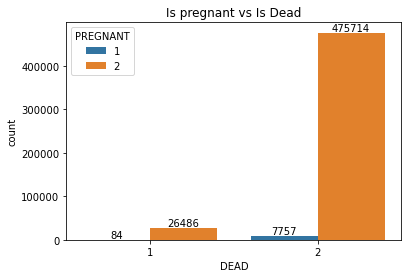

In [32]:
plt.figure()
ax = sns.countplot(df.DEAD, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Is pregnant vs Is Dead",color="BLACK")

In [24]:
# I was curious if being pregnant with covid increased your chance of death so I made a graph.
preg = 84/7757
not_preg = 26486/475714
print("chance of death while pregnant:",preg)
print("chance of death when not pregnant:",not_preg)

print("conclusion: pregnancy alone doesn't affect death risk")


df.head()

chance of death while pregnant: 0.010828928709552663
chance of death when not pregnant: 0.05567630971550133
conclusion: pregnancy alone doesn't affect death risk


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,2
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,3,2,1
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,3,97,1
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,1,1,2,2,2,1,2,3,97,1


Text(0.5, 1.0, 'Has Diabetes vs Is Dead')

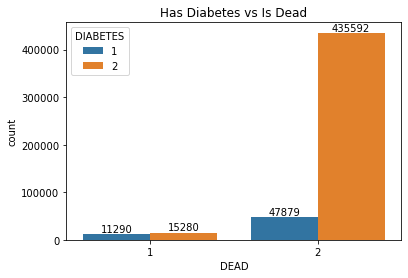

In [33]:
plt.figure()
ax = sns.countplot(df.DEAD, hue = df.DIABETES)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Has Diabetes vs Is Dead",color="BLACK")

In [34]:
# I was curious if having just diabetes with covid increased your chance of death so I made a graph.
has_diab = 11290/47879
not_diab = 15280/435592
print("chance of death wwith diabetes:",has_diab)
print("chance of death without having diabetes:",not_diab)

print("conclusion: diabetes alone greatly affects death risk vs those without diabetes. It is safe to assume the OBESITY variable will be similiar.")

chance of death wwith diabetes: 0.2358027527726143
chance of death without having diabetes: 0.03507869749674007
conclusion: pregnancy alone doesn't affect death risk


Text(0.5, 1.0, 'Age vs Is Dead')

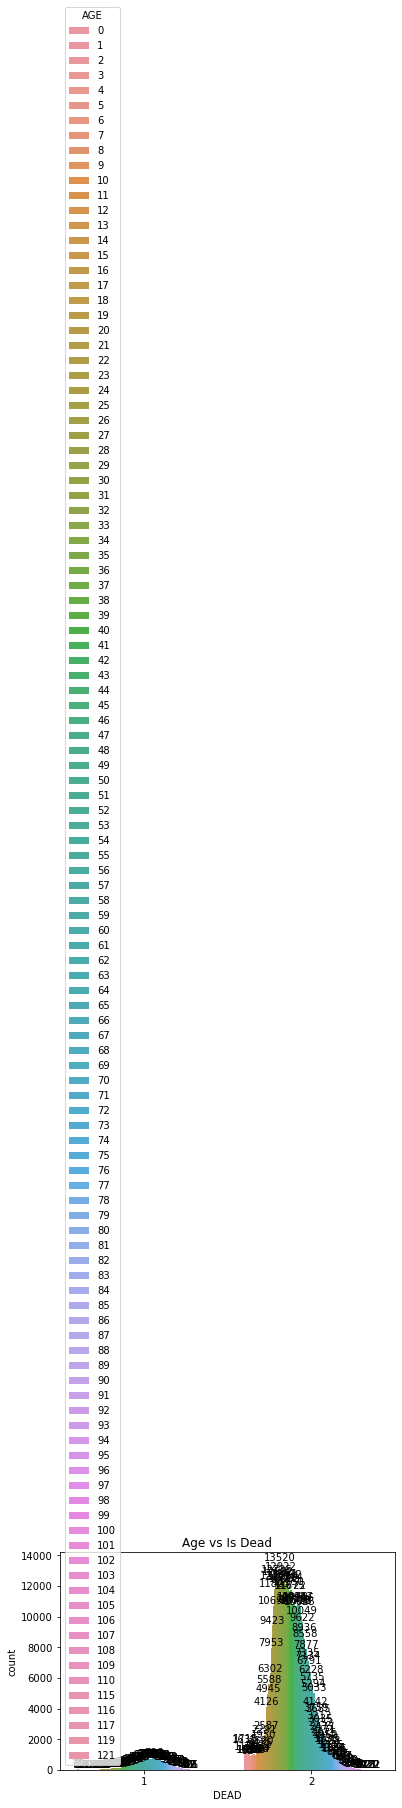

In [36]:
plt.figure()
ax = sns.countplot(df.DEAD, hue = df.AGE)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Age vs Is Dead",color="BLACK")

In [37]:
#In the graph above I couldn't get the legend to increment by a smaller age amount for the gradient legend but the graph still shows that the blue/turqiouse
# age range (65-75) above the 1 column for the dead x-axis has the highest death count.
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,3,2,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,3,97,2
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,1,1,2,2,2,1,2,3,97,2


Text(0.5, 1.0, 'Other Disease vs Is Dead')

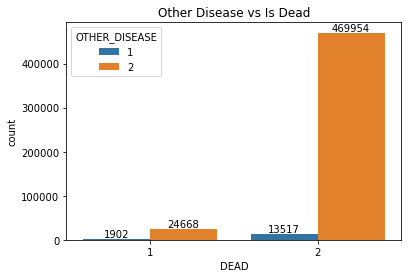

In [39]:
plt.figure()
ax = sns.countplot(df.DEAD, hue = df.OTHER_DISEASE)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Other Disease vs Is Dead",color="BLACK")

In [40]:
has_dis = 1902/13517
not_dis = 24668/469954
print("chance of death wwith other disease:",has_dis)
print("chance of death without having other disease:",not_dis)

print("conclusion: Having another disease alone greatly affects death risk vs those without another disease.")

chance of death wwith diabetes: 0.14071169638233336
chance of death without having diabetes: 0.05249024372598169
conclusion: diabetes alone greatly affects death risk vs those without diabetes. It is safe to assume the OBESITY variable will be similiar.


Text(0.5, 1.0, 'Tobacco Use vs Is Dead')

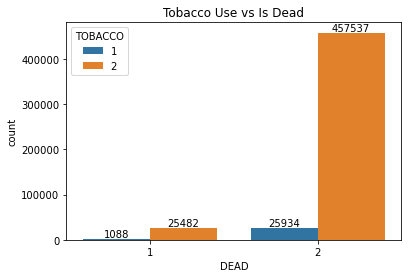

In [45]:
plt.figure()
ax = sns.countplot(df.DEAD, hue = df.TOBACCO)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Tobacco Use vs Is Dead",color="BLACK")

In [46]:
has_tob = 1088/25934
not_tob = 25482/457537
print("chance of death with tobacco user:",has_tob)
print("chance of death with non tobacco user:",not_tob)

print("conclusion: Being a tobacco User doesn't alone greatly affect death risk vs those who aren't tobacco users.")

chance of death with tobacco user: 0.041952649032158555
chance of death with non tobacco user: 0.05569385645313931
conclusion: Being a tobacco User doesn't alone greatly affect death risk vs those who aren't tobacco users.


Text(0.5, 1.0, 'Has Ventilator vs Is Dead')

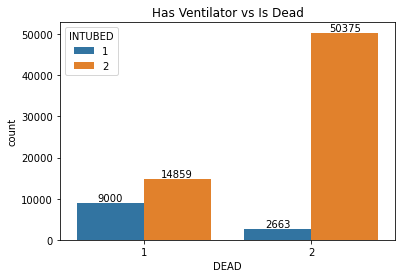

In [49]:
df = df[(df.INTUBED == 1) | (df.INTUBED == 2)]

plt.figure()
ax = sns.countplot(df.DEAD, hue = df.INTUBED)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Has Ventilator vs Is Dead",color="BLACK")

In [ ]:
# This finding is very important. For patients who were connected to a ventilator at some point, they were more likely to die than to survive.

Text(0.5, 1.0, 'Has Pneumonia vs Is Dead')

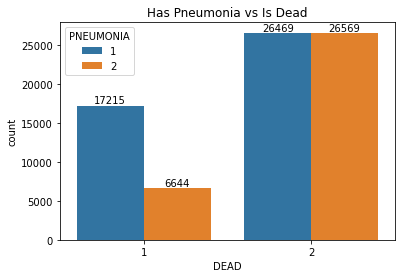

In [51]:
plt.figure()
ax = sns.countplot(df.DEAD, hue = df.PNEUMONIA)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Has Pneumonia vs Is Dead",color="BLACK")

In [52]:
has_nom = 17215/26469
not_nom = 6644/26569
print("chance of death with person with pnuemonia:",has_nom)
print("chance of death with person without pnuemonia:",not_nom)

print("conclusion: Having pnuemonia significantly increases chance of death vs those who don't have it.")

chance of death with person with pnuemonia: 0.6503834674524916
chance of death with person without pnuemonia: 0.250065866235086
conclusion: Being a tobacco User doesn't alone greatly affect death risk vs those who aren't tobacco users.


Text(0.5, 1.0, 'Has Chronic obstructive pulmonary disease vs Is Dead')

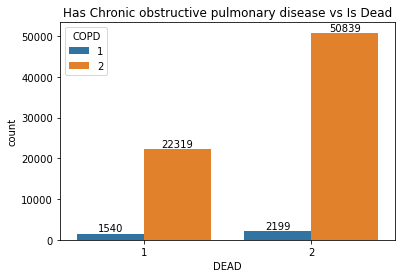

In [57]:
plt.figure()
ax = sns.countplot(df.DEAD, hue = df.COPD)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Has Chronic obstructive pulmonary disease vs Is Dead",color="BLACK")

In [ ]:
# Will include

Text(0.5, 1.0, 'Is Immunosuppressed vs Is Dead')

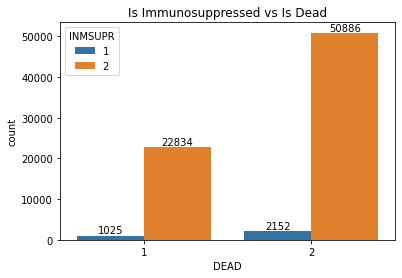

In [60]:
plt.figure()
ax = sns.countplot(df.DEAD, hue = df.INMSUPR)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Is Immunosuppressed vs Is Dead",color="BLACK")

In [71]:
# Won't include.
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,HIPERTENSION,OTHER_DISEASE,OBESITY,RENAL_CHRONIC,CLASIFFICATION_FINAL,ICU,DEAD
5,2,1,2,9999-99-99,2,1,40,2,2,2,2,2,2,3,2,2
8,2,1,2,9999-99-99,2,2,37,1,2,1,2,1,2,3,2,2
9,2,1,2,9999-99-99,2,2,25,2,2,2,2,2,2,3,2,2
16,2,1,2,9999-99-99,2,1,80,2,2,1,2,2,2,3,1,2
56,2,1,2,9999-99-99,1,1,58,2,2,1,2,1,2,7,1,2


In [ ]:
# after analyzing which variables are important I need to remove the variables that aren't as important.
# I want to drop; SEX, PREGNANT, ASTHMA, INMSUPR, TOBACCO, MEDICAL_UNIT, CLASSIFICATION_FINAL
# Below is my new df with variables that I beleive have a strong enough correlation to determine risk.

In [96]:
new = df.filter(['USMER','PATIENT_TYPE', 'PNEUMONIA', 'DIABETES', 'HIPERTENSION','RENAL_CHRONIC', 'ICU', 'DEAD', 'COPD'], axis=1)



In [97]:
x = new.drop(columns="DEAD")
y = new["DEAD"]

In [ ]:
# splitting x and y into new training and test set with 80% of the data as training data and 20% as test

In [98]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (61517, 8)
Test_x : (15380, 8)
Train_y : (61517,)
Test_y : (15380,)


In [99]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.687256176853056


In [ ]:
#The model has almost a 69% accuracy which is not very good but would technically still be much better than just flipping a coin and guessing whether a
# patient was at high or low risk. I think the reason for why it has a lower accuracy than desired is because
# I need to find a way to put more emphasis or value for certain variables than others. For example diabetes has
# a much larger impact than Chronic obstructive pulmonary disease but that in particular isn't being emphasized more so in the model.

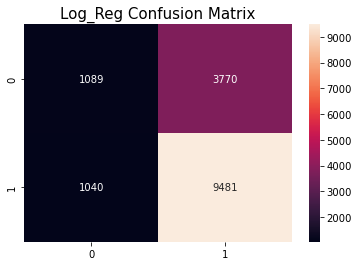

In [106]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Log_Reg Confusion Matrix",fontsize=15, color="black")

In [ ]:
# As seen from the confusion matrix output the True Negative square in the bottom right is performing very well at classifying correctly
# for samples from the negative class, but the TP and FN blocks are not performing as well. As you can see the correct classifications are on the 
# diagonal from top left to bottom right and that figure is 10,570 while the other diagonal for incorrect classifications is 4,810. So clearly the 
# model is atleast classifying correctly more often than incorrectly.

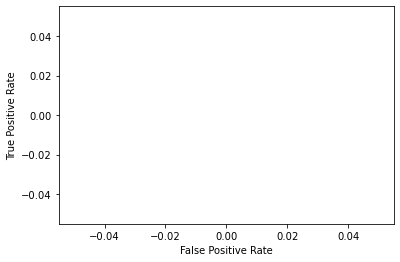

In [138]:
from sklearn import metrics

log_regression = LogisticRegression()
log_regression.fit(train_x,train_y)


y_pred_proba = log_regression.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
# Im not sure if you can see the curve or not but it shows and then I'll rerun the code block and then it diseappears. It looks like a curve from the bottom 
# left to the top right and is curving towards the top left of the graph, which is good but it should be going towards the top left corner more
# than it is. I would then calculate the area under the curve and hopefully it would be close to 1 since the closer to 1 the better and more accurate.

In [ ]:
# In conclusion if I had more time I would look deeper into the relationships between
# the variables and try and find a better way to compare the variables then just looking
# at how certain variables compare to the is dead variable. I would also try and find a way to 
# make certain variables carry more weight than others depending on how much that variable is affecting the
# patients risk on its own.